# Proyecto 1 security data science (Detección de primeros frudes en una tarjeta)

## Análisis exploratorio 

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv("feature_engineering_work\dataset_feature_engineering.csv")

In [127]:
# Vista general
print(df.shape)
print(df.columns)
print(df.head())

(1852394, 35)
Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
       'count_month_shopping_net', 'first_time_at_merchant',
       'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour',
       'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
       'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day'],
      dtype='object')
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534

In [128]:
# Tipos de datos y valores nulos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


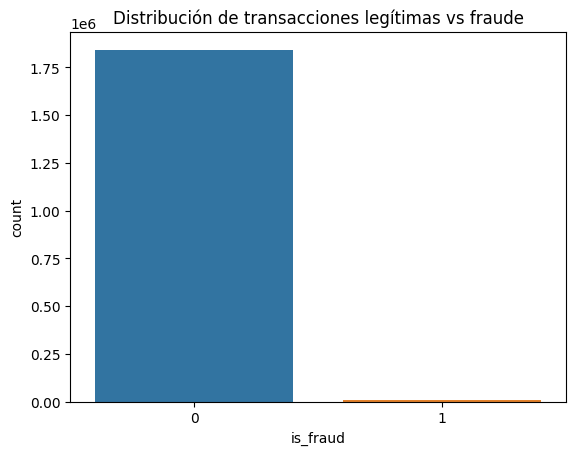

In [129]:
# Distribución de la variable objetivo
sns.countplot(data=df, x="is_fraud")
plt.title("Distribución de transacciones legítimas vs fraude")
plt.show()

In [130]:
# Porcentaje de fraudes
fraud_rate = df['is_fraud'].mean() * 100
print(f"Tasa de fraude: {fraud_rate:.2f}%")

Tasa de fraude: 0.52%


In [131]:
# Descripción estadística
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


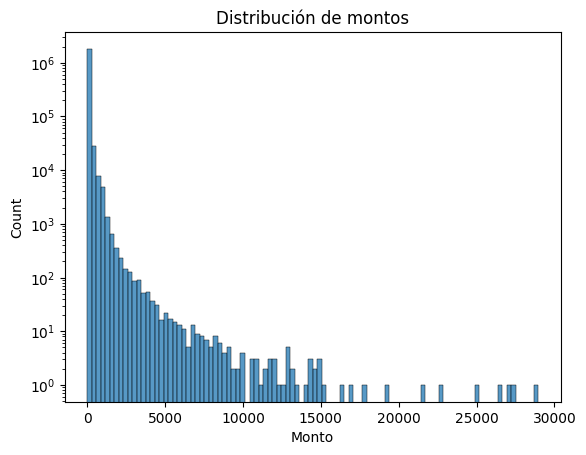

In [132]:
# Distribución de montos
sns.histplot(df['amt'], bins=100, log_scale=(False, True))
plt.title("Distribución de montos")
plt.xlabel("Monto")
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


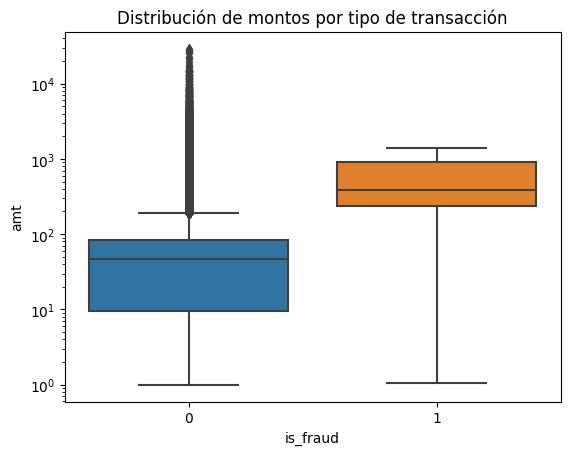

In [133]:
# Comparación de montos en fraudes vs legítimos
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.yscale('log')  # Montos muy variables
plt.title("Distribución de montos por tipo de transacción")
plt.show()

## EDA para tarjetas

In [134]:
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
df = df.sort_values(by=['cc_num', 'trans_date'])

In [135]:
tarjetas_con_fraude = df[df['is_fraud'] == 1]['cc_num'].nunique()
print(f"Tarjetas con al menos un fraude: {tarjetas_con_fraude}")


Tarjetas con al menos un fraude: 976


In [136]:
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
primer_fraude_por_tarjeta = df[df['is_fraud'] == 1].sort_values(['cc_num', 'trans_date']).groupby('cc_num').first().reset_index()

primer_fraude_por_tarjeta


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,trans_date
0,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,48.011851,3,4,1,2019,6,5,1,1,2012-03-01 01:32:53
1,60422928733,fraud_VonRueden Group,grocery_net,8.05,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,SC,...,108.095379,4,2,0,2019,1,1,1,1,2012-04-17 00:08:16
2,60423098130,fraud_Bradtke PLC,grocery_pos,317.39,Jason,Gray,M,875 Amy Point,Amorita,OK,...,59.833517,3,3,2,2019,3,3,1,1,2012-03-14 02:21:34
3,60427851591,fraud_Hudson-Ratke,grocery_pos,289.11,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,OK,...,86.105475,4,1,3,2019,1,1,1,1,2012-04-16 03:29:43
4,60487002085,"fraud_Moen, Reinger and Murphy",grocery_pos,337.39,David,White,M,66234 Hall Lock Suite 758,Jackson,MS,...,117.193549,9,1,1,2020,3,2,1,1,2013-09-22 01:11:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,4958589671582726883,fraud_Bailey-Morar,grocery_pos,285.80,Aaron,Pena,M,793 Hooper Tunnel Suite 154,Burke,VA,...,37.890299,10,5,2,2020,7,4,2,2,2013-10-17 02:48:40
972,4973530368125489546,fraud_Kuhic Inc,grocery_pos,301.54,Mary,Rodriguez,F,8986 Fitzgerald Plains,Winslow,AR,...,94.211672,8,4,0,2019,2,1,1,1,2012-08-30 00:13:53
973,4980323467523543940,fraud_Bednar Group,misc_net,690.55,Patrick,Massey,M,7812 Shane Shoals Apt. 607,North Haverhill,NH,...,69.060243,4,3,22,2020,1,1,1,1,2013-04-16 22:08:26
974,4989847570577635369,fraud_Kiehn Inc,grocery_pos,352.15,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,SC,...,63.352320,7,5,3,2020,4,2,1,1,2013-07-04 03:17:41


In [137]:
primera_transaccion = df.groupby('cc_num')['trans_date'].min().reset_index()
primer_fraude_merged = pd.merge(primer_fraude_por_tarjeta[['cc_num', 'trans_date']], primera_transaccion, on='cc_num', suffixes=('_fraude', '_inicio'))
primer_fraude_merged['dias_hasta_fraude'] = (primer_fraude_merged['trans_date_fraude'] - primer_fraude_merged['trans_date_inicio']).dt.days



c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


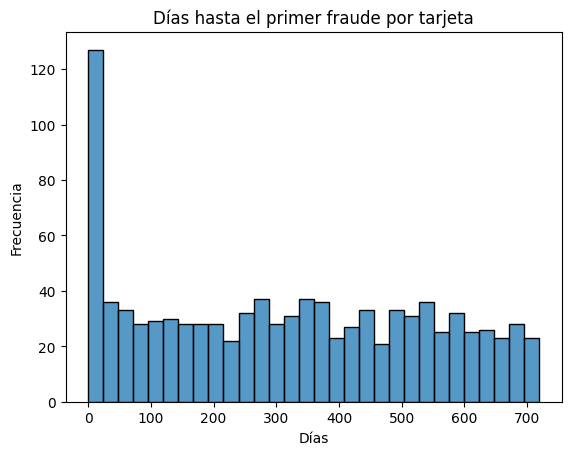

In [138]:
sns.histplot(primer_fraude_merged['dias_hasta_fraude'], bins=30)
plt.title("Días hasta el primer fraude por tarjeta")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.show()

In [139]:
primer_fraude_merged


,cc_num,trans_date_fraude,trans_date_inicio,dias_hasta_fraude
0,60416207185,2012-03-01 01:32:53,2012-01-01 12:47:15,59
1,60422928733,2012-04-17 00:08:16,2012-01-03 18:38:26,104
2,60423098130,2012-03-14 02:21:34,2012-01-01 06:48:36,72
3,60427851591,2012-04-16 03:29:43,2012-01-01 07:36:27,105
4,60487002085,2013-09-22 01:11:51,2012-01-06 03:23:55,624
...,...,...,...,...
971,4958589671582726883,2013-10-17 02:48:40,2012-01-01 01:38:31,655
972,4973530368125489546,2012-08-30 00:13:53,2012-01-03 12:31:03,239
973,4980323467523543940,2013-04-16 22:08:26,2012-01-02 07:45:21,470
974,4989847570577635369,2013-07-04 03:17:41,2012-01-02 13:15:20,548


In [140]:
primer_fraude_por_tarjeta['first_time_at_merchant'].value_counts(normalize=True)


first_time_at_merchant
False    0.550205
True     0.449795
Name: proportion, dtype: float64

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


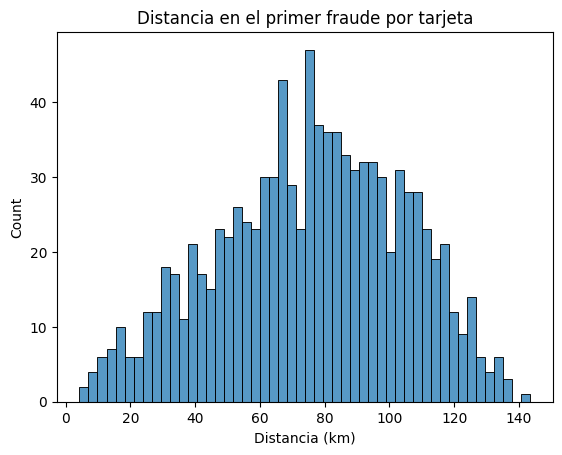

In [141]:

sns.histplot(primer_fraude_por_tarjeta['dist_between_client_and_merch'], bins=50)
plt.title("Distancia en el primer fraude por tarjeta")
plt.xlabel("Distancia (km)")
plt.show()


In [142]:
n_tarjetas_unicas = df['cc_num'].nunique()
print(f"Cantidad de tarjetas únicas: {n_tarjetas_unicas}")


Cantidad de tarjetas únicas: 999


In [143]:
#categorias que aparecen mas en primeros fraudes 
primeros_fraudes = df[df['is_fraud'] == 1].sort_values(by='unix_time').drop_duplicates(subset='cc_num', keep='first')

# Ver las categorías más comunes en esos primeros fraudes
categoria_fraudes = primeros_fraudes['category'].value_counts(normalize=True) * 100
print(categoria_fraudes)

category
grocery_pos       43.340164
gas_transport     17.520492
shopping_net      10.450820
misc_net           8.811475
shopping_pos       6.762295
grocery_net        4.098361
misc_pos           3.073770
entertainment      1.434426
food_dining        1.434426
personal_care      0.819672
kids_pets          0.717213
travel             0.614754
health_fitness     0.512295
home               0.409836
Name: proportion, dtype: float64


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

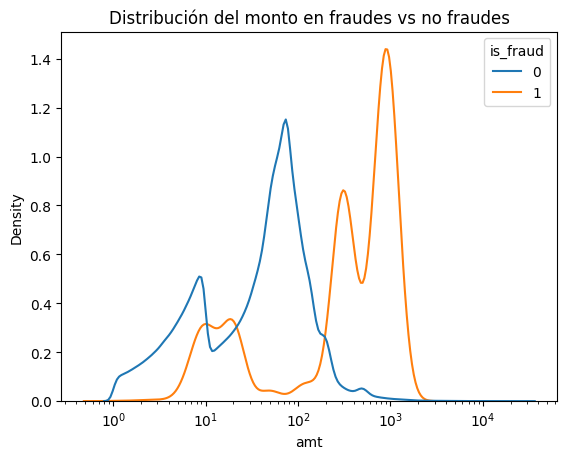

In [144]:
sns.kdeplot(data=df, x='amt', hue='is_fraud', common_norm=False, log_scale=True)
plt.title("Distribución del monto en fraudes vs no fraudes")
plt.show()

## Limpieza de Dataframe 

In [145]:
# %% Limpieza de DataFrame

# Convertir el tiempo Unix a formato de fecha
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')

# (Opcional pero recomendado) Ordenar por tarjeta y fecha de transacción
df = df.sort_values(by=['cc_num', 'trans_date']).reset_index(drop=True)

# Verificación rápida de valores nulos (puedes profundizar en EDA)
print(df.isnull().sum())

# Confirmar que no se eliminan transacciones
print("Total de transacciones:", len(df))
print("Total de fraudes:", df['is_fraud'].sum())


cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

## Ingeniería de variables 

In [264]:
# Convertir unix_time a datetime si no lo has hecho
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')

# Crear variable transaccion_noche: 1 si la hora es antes de 6 o después de 22, else 0
df['transaccion_noche'] = df['hour'].apply(lambda x: 1 if (x < 6 or x > 22) else 0)

# Variable alto_monto: 1 si amt > percentil 95, else 0
umbral_alto_monto = df['amt'].quantile(0.95)
df['alto_monto'] = df['amt'].apply(lambda x: 1 if x > umbral_alto_monto else 0)

# Relación gasto mensual vs anual (para evitar división por cero sumo pequeño epsilon)
df['relacion_gasto_mes_anual'] = df['amt_month'] / (df['amt_year'] + 1e-5)

# Transformación logarítmica de monto
df['log_amt'] = np.log1p(df['amt'])

# Convertir booleanos a enteros para el modelo
bool_cols = ['first_time_at_merchant', 'transaccion_noche', 'alto_monto']
for col in bool_cols:
    df[col] = df[col].astype(int)

# Seleccionar las columnas que usaremos
columnas_utiles = [
    'is_fraud',
    'transaccion_noche',
    'alto_monto',
    'relacion_gasto_mes_anual',
    'dist_between_client_and_merch',
    'first_time_at_merchant',
    'category',
    'log_amt',
    'trans_date',
    'times_shopped_at_merchant',
    'times_shopped_at_merchant_year',
    'times_shopped_at_merchant_month',
    'times_shopped_at_merchant_day',
    'hour',
    'trans_month',
    'trans_day',
    'city_pop',
]

df_modelo = df[columnas_utiles].copy()

In [186]:
df_modelo

,is_fraud,transaccion_noche,alto_monto,relacion_gasto_mes_anual,dist_between_client_and_merch,first_time_at_merchant,category,log_amt,trans_date,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,hour,trans_month,trans_day,city_pop,trans_date
0,0,0,0,0.999999,127.629296,1,misc_net,2.112635,2012-01-01 12:47:15,5,2,1,1,12,1,1,1645,2012-01-01 12:47:15
1,0,0,0,1.000000,110.202992,1,gas_transport,3.987872,2012-01-02 08:44:57,12,3,2,2,8,1,2,1645,2012-01-02 08:44:57
2,0,0,0,1.000000,21.841827,1,gas_transport,4.419804,2012-01-02 08:47:36,10,9,1,3,8,1,2,1645,2012-01-02 08:47:36
3,0,0,0,1.000000,87.124420,1,kids_pets,3.577669,2012-01-02 12:38:14,7,2,1,1,12,1,2,1645,2012-01-02 12:38:14
4,0,0,0,1.000000,74.352876,1,home,3.338613,2012-01-02 13:10:46,3,2,1,2,13,1,2,1645,2012-01-02 13:10:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,0.147864,44.930513,0,gas_transport,4.206333,2013-12-31 02:10:10,7,6,2,1,2,12,3,532,2013-12-31 02:10:10
1852390,0,1,0,0.147907,81.527378,0,misc_net,1.719189,2013-12-31 05:13:35,4,3,1,1,5,12,3,532,2013-12-31 05:13:35
1852391,0,0,0,0.148792,36.017775,0,gas_transport,4.574299,2013-12-31 11:15:44,6,2,1,3,11,12,3,532,2013-12-31 11:15:44
1852392,0,0,0,0.150168,81.940542,0,grocery_pos,5.013830,2013-12-31 11:17:25,2,1,1,1,11,12,3,532,2013-12-31 11:17:25


### One-Hot encoding para variables categóricas

In [265]:
# Extraer más info temporal si quieres (día de la semana, etc)
df_modelo['dayofweek'] = df_modelo['trans_date'].dt.dayofweek
df_modelo['is_weekend'] = df_modelo['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Convertir variables categóricas con One-Hot Encoding
df_modelo = pd.get_dummies(df_modelo, columns=['category'], drop_first=True)



# Revisa tipos booleanos y convierte a int (si quedan)
bool_cols = df_modelo.select_dtypes(include=['bool']).columns
df_modelo[bool_cols] = df_modelo[bool_cols].astype(int)


In [182]:
df_modelo

,is_fraud,transaccion_noche,alto_monto,relacion_gasto_mes_anual,dist_between_client_and_merch,first_time_at_merchant,log_amt,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,0,0,0.999999,127.629296,1,2.112635,5,2,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1.000000,110.202992,1,3.987872,12,3,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1.000000,21.841827,1,4.419804,10,9,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.000000,87.124420,1,3.577669,7,2,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1.000000,74.352876,1,3.338613,3,2,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,0.147864,44.930513,0,4.206333,7,6,2,...,0,0,0,0,0,0,0,0,0,0
1852390,0,1,0,0.147907,81.527378,0,1.719189,4,3,1,...,0,0,0,0,1,0,0,0,0,0
1852391,0,0,0,0.148792,36.017775,0,4.574299,6,2,1,...,0,0,0,0,0,0,0,0,0,0
1852392,0,0,0,0.150168,81.940542,0,5.013830,2,1,1,...,1,0,0,0,0,0,0,0,0,0


## Modelo Base LightGBM 

In [207]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

In [208]:
# Ordenar por fecha para respetar la secuencia temporal
df_modelo_ordenado = df_modelo.sort_values('trans_date')

# Definir la fecha de corte del último trimestre (percentil 75)
fecha_corte = df_modelo_ordenado['trans_date'].quantile(0.75)

# Separar entrenamiento (antes de la fecha de corte) y test (último trimestre)
df_train = df_modelo_ordenado[df_modelo_ordenado['trans_date'] < fecha_corte].copy()
df_test = df_modelo_ordenado[df_modelo_ordenado['trans_date'] >= fecha_corte].copy()

# Separar variables predictoras y objetivo
X_train = df_train.drop(columns=['is_fraud', 'trans_date'])
y_train = df_train['is_fraud']
X_test = df_test.drop(columns=['is_fraud', 'trans_date'])
y_test = df_test['is_fraud']

# Inicializar el modelo base
modelo = LGBMClassifier(random_state=42)


In [209]:
# 5. Entrenar el modelo
modelo.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [210]:
# 6. Predicciones
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

In [211]:
# 7. Evaluación
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

In [212]:
print("AUC-ROC:", round(auc, 4))
print("F1-score:", round(f1, 4))
print("Matriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=4))

AUC-ROC: 0.9517
F1-score: 0.661
Matriz de Confusión:
[[460828    511]
 [   639   1121]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9986    0.9989    0.9988    461339
           1     0.6869    0.6369    0.6610      1760

    accuracy                         0.9975    463099
   macro avg     0.8428    0.8179    0.8299    463099
weighted avg     0.9974    0.9975    0.9975    463099



## Definición de métricas personalizadas 

In [297]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE


In [314]:
# Split temporal (igual para ambos modelos)
df_modelo_ordenado = df_modelo.sort_values('trans_date')
fecha_corte = df_modelo_ordenado['trans_date'].quantile(0.75)
df_train = df_modelo_ordenado[df_modelo_ordenado['trans_date'] < fecha_corte].copy()
df_test = df_modelo_ordenado[df_modelo_ordenado['trans_date'] >= fecha_corte].copy()

X_train = df_train.drop(columns=['is_fraud', 'trans_date'])
y_train = df_train['is_fraud']
X_test = df_test.drop(columns=['is_fraud', 'trans_date'])
y_test = df_test['is_fraud']

# Crear datasets LightGBM para entrenamiento con métrica personalizada
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

In [309]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'verbose': -1
}

In [310]:
def ratio_fp_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)
    TP = ((y_pred_binary == 1) & (y_true == 1)).sum()
    FP = ((y_pred_binary == 1) & (y_true == 0)).sum()
    ratio_fp = (TP + FP) / TP if TP > 0 else float('inf')
    return 'ratio_fp', ratio_fp, False  # menor es mejor

from sklearn.metrics import f1_score

def f1_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)
    f1 = f1_score(y_true, y_pred_binary)
    return 'f1', f1, True  # mayor es mejor

from sklearn.metrics import recall_score

def recall_fraud_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)
    recall = recall_score(y_true, y_pred_binary)
    return 'recall_fraud', recall, True

from sklearn.metrics import precision_score

def precision_fraud_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)
    precision = precision_score(y_true, y_pred_binary)
    return 'precision_fraud', precision, True

def fn_ratio_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)
    FN = ((y_pred_binary == 0) & (y_true == 1)).sum()
    TP = ((y_pred_binary == 1) & (y_true == 1)).sum()
    ratio_fn = FN / TP if TP > 0 else float('inf')
    return 'fn_tp_ratio', ratio_fn, False  # menor es mejor




In [315]:
modelo_lgb = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'val'],
    feval=lambda y_pred, train_data: [
        f1_metric(y_pred, train_data),
        ratio_fp_metric(y_pred, train_data),
        recall_fraud_metric(y_pred, train_data),
        fn_ratio_metric(y_pred, train_data)
    ],
    num_boost_round=100,
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]
)


Training until validation scores don't improve for 10 rounds
[10]	train's auc: 0.934752	train's f1: 0.756829	train's ratio_fp: 1.17451	train's recall_fraud: 0.681156	train's fn_tp_ratio: 0.468093	val's auc: 0.926399	val's f1: 0.703656	val's ratio_fp: 1.23792	val's recall_fraud: 0.623295	val's fn_tp_ratio: 0.604376
Early stopping, best iteration is:
[2]	train's auc: 0.951452	train's f1: 0.774422	train's ratio_fp: 1.19624	train's recall_fraud: 0.721328	train's fn_tp_ratio: 0.386332	val's auc: 0.945065	val's f1: 0.726044	val's ratio_fp: 1.26565	val's recall_fraud: 0.671591	val's fn_tp_ratio: 0.489002


In [316]:
y_proba = modelo_lgb.predict(X_test)
y_pred = (y_proba >= 0.60).astype(int)

In [317]:
# Evaluación
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba), 4))
print("F1-score:", round(f1_score(y_test, y_pred), 4))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=4))

AUC-ROC: 0.9451
F1-score: 0.727
Matriz de Confusión:
[[461031    308]
 [   579   1181]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9987    0.9993    0.9990    461339
           1     0.7931    0.6710    0.7270      1760

    accuracy                         0.9981    463099
   macro avg     0.8959    0.8352    0.8630    463099
weighted avg     0.9980    0.9981    0.9980    463099



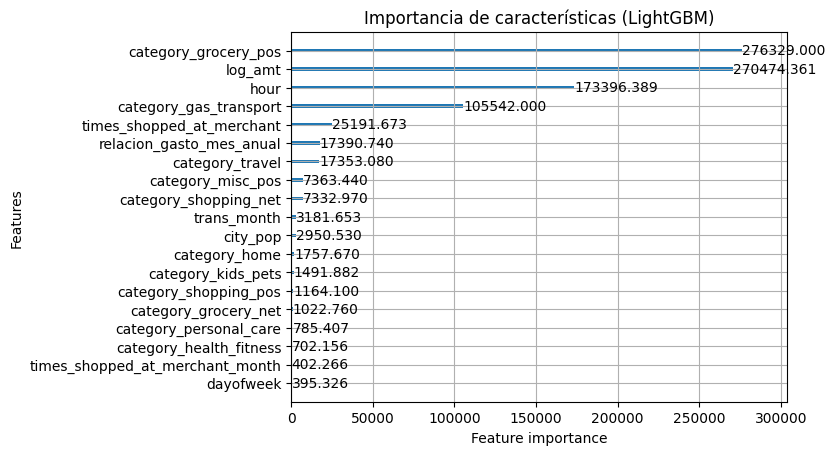

Características con importancia 0:
['first_time_at_merchant', 'dist_between_client_and_merch', 'transaccion_noche']


In [318]:
lgb.plot_importance(modelo_lgb, max_num_features=20, importance_type='gain')
plt.title("Importancia de características (LightGBM)")
plt.show()

#imprimir la importancia 
importances = modelo_lgb.feature_importance(importance_type='gain')
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
#print(importance_df.head(20))

#imprimir las de importancia 0 
print("Características con importancia 0:")
print(importance_df[importance_df['importance'] == 0]['feature'].tolist())

In [319]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"Threshold: {thresh:.2f} → F1-score: {f1_score(y_test, y_pred_thresh):.4f}")


Threshold: 0.10 → F1-score: 0.7107
Threshold: 0.15 → F1-score: 0.7121
Threshold: 0.20 → F1-score: 0.7211
Threshold: 0.25 → F1-score: 0.7260
Threshold: 0.30 → F1-score: 0.7260
Threshold: 0.35 → F1-score: 0.7260
Threshold: 0.40 → F1-score: 0.7260
Threshold: 0.45 → F1-score: 0.7260
Threshold: 0.50 → F1-score: 0.7260
Threshold: 0.55 → F1-score: 0.7260
Threshold: 0.60 → F1-score: 0.7270
Threshold: 0.65 → F1-score: 0.7252
Threshold: 0.70 → F1-score: 0.7227
Threshold: 0.75 → F1-score: 0.7227
Threshold: 0.80 → F1-score: 0.7227
Threshold: 0.85 → F1-score: 0.7219


In [283]:
df_modelo = df_modelo.drop(columns=['category_food_dining','is_weekend','times_shopped_at_merchant_day','alto_monto', 'category_misc_net', 'trans_day', 'times_shopped_at_merchant_year', 'alto_monto', 'category_misc_net', 'trans_day', 'times_shopped_at_merchant_year'], errors='ignore')  # Eliminar si no es relevante
